In [263]:
import tensorflow as tf
print(tf.__version__)

2.4.0-rc0


In [264]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
# from keras.layers.normalization import BatchNormalization
# from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [265]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'

In [282]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

# vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#We are using vgg19 because it gives us better accuracy compared to vgg16


In [267]:
# don't train existing weights
# for layer in mobilnet.layers:
#     layer.trainable = False

In [268]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [269]:
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [270]:
# our layers - you can add more if you want
# x = Flatten()(mobilnet.output)

In [283]:
# prediction = Dense(len(folders), activation='softmax')(x)

# # create a model object
# model = Model(inputs=vgg19.input, outputs=prediction)

In [272]:
# model.summary()


In [274]:
### Create Model from scratch using CNN

model=Sequential()
#Layer 1
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))

#Layer2
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))        
model.add(MaxPooling2D(pool_size=2))
        
#Layer3
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))
          
#Layer4
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Flatten())
          
# Dense Layer
# model.add(Dropout(0.25))
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 128)     

In [275]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [276]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [277]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [278]:
training_set


In [279]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [280]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "saved model/weight-improvement-{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor = "val_acc", verbose = 1, save_best_only= True, mode = 'max')
callbacks_list = [checkpoint]

In [281]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

model.save('malaria.h5')

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
13/13 [==============================] - ETA: 0s - loss: 2.5926 - accuracy: 0.5167WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x3461ae430> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=

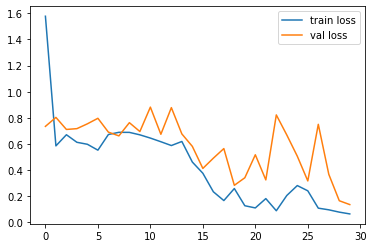

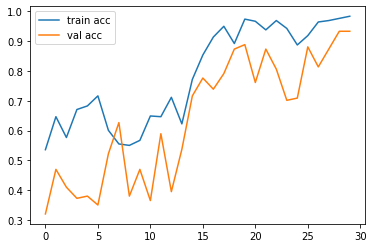

<Figure size 432x288 with 0 Axes>

In [284]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [285]:
# save it as a h5 file


# from tensorflow.keras.models import load_model

# model.save('model_vgg19.h5')

In [286]:
y_pred = model.predict(test_set)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [287]:
y_pred

array([[1.00000000e+00, 1.44323390e-22],
       [9.98338223e-01, 1.66177109e-03],
       [1.00000000e+00, 1.24226392e-35],
       [1.00000000e+00, 1.18155689e-13],
       [1.00000000e+00, 9.78939899e-29],
       [1.00000000e+00, 2.68708924e-19],
       [1.00000000e+00, 7.70487556e-18],
       [5.74481627e-03, 9.94255245e-01],
       [1.00000000e+00, 3.28162081e-11],
       [5.42103648e-02, 9.45789576e-01],
       [1.00000000e+00, 6.14232184e-26],
       [3.09332043e-01, 6.90667927e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.54373329e-02, 9.84562695e-01],
       [1.00000000e+00, 1.99423706e-23],
       [1.00000000e+00, 1.93746524e-38],
       [1.00000000e+00, 1.03892221e-10],
       [1.27986250e-02, 9.87201333e-01],
       [2.55428087e-02, 9.74457204e-01],
       [9.96060193e-01, 3.93983070e-03],
       [1.74889620e-02, 9.82510984e-01],
       [1.69574842e-02, 9.83042598e-01],
       [9.98178720e-01, 1.82128721e-03],
       [9.50390473e-02, 9.04960930e-01],
       [1.000000

In [288]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [289]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0])

In [290]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [291]:
model=load_model('malaria.h5')

AttributeError: 'str' object has no attribute 'decode'

In [292]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [293]:
x=image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [294]:
x.shape

(224, 224, 3)

In [295]:
x=x/255

In [296]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [297]:
model.predict(img_data)


array([[0., 1.]], dtype=float32)

In [298]:
a=np.argmax(model.predict(img_data), axis=1)

In [299]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
